# Capacitated Vehicle Routing Problem

<img src="http://neo.lcc.uma.es/dynamic/images/vrp.png" width="400" />

- $n$ is the number of clientes
- $N$ is set of clients, with $N=\{1,2,...,n\}$
- $V$ is set of vetices (or nodes), with $V=\{0\}\cup N$
- $A$ is set of arcs, with $A=\{(i,j)\in V^2 : i\neq j\}$
- $c_{ij}$ is cost of travel over arc $(i,j)\in A$
- $Q$ is the vehicle capacity
- $q_i$ is the amount that has to be delivered to customer $i\in N$

Then, the formulation is the following
$$\begin{align}
\min \quad & \sum_{i,j\in A} c_{ij} x_{ij} \\
\text{s.t.} \quad & \sum_{j\in V , j\neq i} x_{ij} = 1  && i \in N \\
& \sum_{i\in V , i\neq j} x_{ij} = 1 && j \in N \\
& \text{if} \ x_{ij}=1 \ \Rightarrow \ u_i + q_j = u_j && i,j \in A : j\neq 0, i\neq 0 \\
& q_i \leq u_i \leq Q && i \in N \\
& x_{ij} \in \{0,1\} && i,j \in A
\end{align}$$

In [3]:
import numpy as np

In [4]:
rnd = np.random
rnd.seed(0)

In [5]:
n = 10
Q = 20
N = [i for i in range(1, n+1)]
V = [0] + N
q = {i: rnd.randint(1, 10) for i in N}

In [6]:
loc_x = rnd.rand(len(V))*200
loc_y = rnd.rand(len(V))*100

In [7]:
import matplotlib.pyplot as plt

(-5.390764142541891, 202.16699573081289, 7.525723005074169, 102.16355380509556)

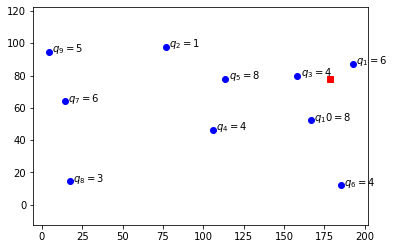

In [8]:
plt.scatter(loc_x[1:], loc_y[1:], c='b')
for i in N:
    plt.annotate('$q_%d=%d$' % (i, q[i]), (loc_x[i]+2, loc_y[i]))
plt.plot(loc_x[0], loc_y[0], c='r', marker='s')
plt.axis('equal')

In [9]:
A = [(i, j) for i in V for j in V if i != j]
c = {(i, j): np.hypot(loc_x[i]-loc_x[j], loc_y[i]-loc_y[j]) for i, j in A}

In [12]:
from docplex.mp.model import Model

In [13]:
mdl = Model('CVRP')

In [14]:
x = mdl.binary_var_dict(A, name='x')
u = mdl.continuous_var_dict(N, ub=Q, name='u')

In [20]:
mdl.minimize(mdl.sum(c[i, j]*x[i, j] for i, j in A))
mdl.add_constraints(mdl.sum(x[i, j] for j in V if j != i) == 1 for i in N)
mdl.add_constraints(mdl.sum(x[i, j] for i in V if i != j) == 1 for j in N)
mdl.add_indicator_constraints(mdl.indicator_constraint(x[i, j], u[i]+q[j] == u[j]) for i, j in A if i != 0 and j != 0)
mdl.add_constraints(u[i] >= q[i] for i in N)
mdl.parameters.timelimit = 15
solution = mdl.solve(log_output=True)

Version identifier: 12.10.0.0 | 2019-11-26 | 843d4de2ae
CPXPARAM_Read_DataCheck                          1
CPXPARAM_TimeLimit                               15
Reduced MIP has 240 rows, 300 columns, and 960 nonzeros.
Reduced MIP has 110 binaries, 0 generals, 0 SOSs, and 180 indicators.
Presolve time = 0.00 sec. (0.13 ticks)
11 of 11 MIP starts provided solutions.
MIP start 'm1' defined initial solution with objective 726.2486.
Tried aggregator 2 times.
MIP Presolve eliminated 40 rows and 0 columns.
MIP Presolve modified 135 coefficients.
Aggregator did 135 substitutions.
Reduced MIP has 65 rows, 165 columns, and 335 nonzeros.
Reduced MIP has 110 binaries, 0 generals, 0 SOSs, and 180 indicators.
Presolve time = 0.02 sec. (0.60 ticks)
Probing time = 0.00 sec. (0.33 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 65 rows, 165 columns, and 335 nonzeros.
Reduced MIP has 110 binaries, 0 generals, 0 SOSs, and 180 indicators.
Presolve time = 0.02 sec. (0.28 ticks)
Probin

In [21]:
print(solution)

solution for: CVRP
objective: 726.249
x_0_2=1
x_0_5=1
x_0_10=1
x_1_0=1
x_2_9=1
x_3_0=1
x_4_0=1
x_5_3=1
x_6_1=1
x_7_8=1
x_8_4=1
x_9_7=1
x_10_6=1
u_1=18.000
u_2=1.000
u_3=20.000
u_4=19.000
u_5=16.000
u_6=12.000
u_7=12.000
u_8=15.000
u_9=6.000
u_10=8.000



In [17]:
solution.solve_status

<JobSolveStatus.OPTIMAL_SOLUTION: 2>

In [18]:
active_arcs = [a for a in A if x[a].solution_value > 0.9]

(-5.390764142541891, 202.16699573081289, 7.525723005074169, 102.16355380509556)

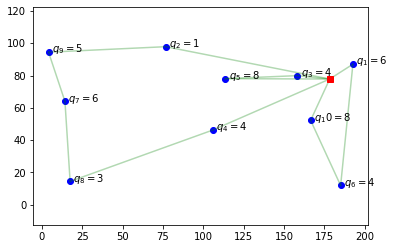

In [19]:
plt.scatter(loc_x[1:], loc_y[1:], c='b')
for i in N:
    plt.annotate('$q_%d=%d$' % (i, q[i]), (loc_x[i]+2, loc_y[i]))
for i, j in active_arcs:
    plt.plot([loc_x[i], loc_x[j]], [loc_y[i], loc_y[j]], c='g', alpha=0.3)
plt.plot(loc_x[0], loc_y[0], c='r', marker='s')
plt.axis('equal')